In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

import mlgrad.func as func
import mlgrad.model as model
import mlgrad.sag as sag

%matplotlib inline

In [2]:
X_r = np.random.random(1000)
Y_r = np.random.random(1000)
X_r = 3 * X_r
Y_r = 3 * Y_r ** 4.0
X0 = np.linspace(0.0, 3.0, 500)
Y0 = 0.9 * X0

X = np.concatenate((X_r, X0))
Y = np.concatenate((Y_r, Y0))
Xv = X.reshape(-1,1)


In [3]:
loss_func = func.Quantile(0.33)
loss_func

In [6]:
param_init = np.random.random((2,))
lm_learn = model.LinearModel(param_init)
print(np.array(lm_learn.param))

alg = sag.SAG(lm_learn, loss_func, h=0.0001, tol=1.0e-5)
alg.fit(Xv, Y)
print("K:", alg.K, "h:", alg.h_mean, "param:", lm_learn.param.base)

[ 0.56821858  0.77620284]
K: 1000 h: 0.0001 param: [  1.72109092e-04   8.99787275e-01]


In [7]:
ransac = lm.RANSACRegressor()
ransac.fit(Xv, Y)
lsm = lm.LinearRegression()
lsm.fit(Xv, Y)
theil = lm.TheilSenRegressor()
theil.fit(Xv, Y)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

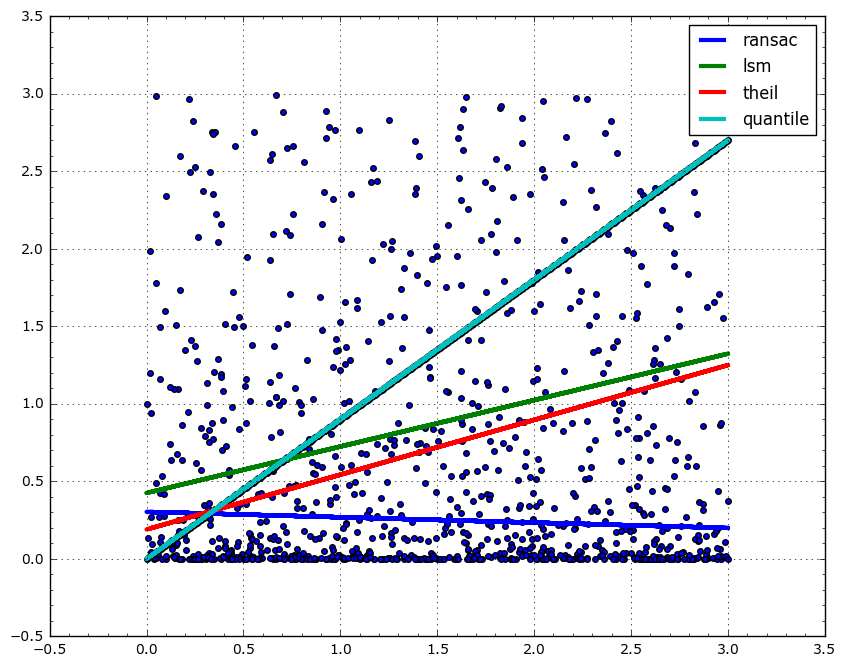

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(X, Y, s=16)
plt.plot(X, ransac.predict(Xv), label='ransac', linewidth=3.0)
plt.plot(X, lsm.predict(Xv), label='lsm', linewidth=3.0)
plt.plot(X, theil.predict(Xv), label='theil', linewidth=3.0)
plt.plot(X, [lm_learn.evaluate(x) for x in Xv], label='quantile', linewidth=3.0)
plt.grid(1)
plt.minorticks_on()
plt.legend(loc='best')
plt.show()